In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')



In [2]:

data = pd.read_csv('./villes.csv', sep=';')


#print(data);
#data.head();

X = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values
print("labels", labels)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

SC = StandardScaler()
SC.fit(X)
Xnorm = SC.transform(X)

pca=PCA(n_components = 12)
print("pca",pca)
pca.fit(Xnorm)

print("explained_variance_", pca.explained_variance_)

# On demande un ratio de 90% de l'information
requestedRatio = 0.9
sumRatio = 0
nbVar = 0
print("explained_variance_ratio_", pca.explained_variance_ratio_)
for nextRatio in pca.explained_variance_ratio_ :
    sumRatio = sumRatio + nextRatio
    print(nextRatio, sumRatio )
    nbVar = nbVar+1
    if(sumRatio>=requestedRatio): 
        print("ok",sumRatio )
        break

# Ici on prend les deux premières variables pour avoir 90% de l'information
print("nbVar", nbVar)


labels ['ajac' 'ange' 'ango' 'besa' 'biar' 'bord' 'bres' 'cler' 'dijo' 'embr'
 'gren' 'lill' 'limo' 'lyon' 'mars' 'mont' 'nanc' 'nant' 'nice' 'nime'
 'orle' 'pari' 'perp' 'reim' 'renn' 'roue' 'stqu' 'stra' 'toul' 'tlse'
 'tour' 'vich']
pca PCA(n_components=12)
explained_variance_ [10.80999558  1.45184229  0.0581652   0.03279996  0.01406283  0.00621041
  0.00523837  0.00406512  0.00187861  0.00145726  0.0010361   0.00034505]
explained_variance_ratio_ [0.87268193 0.11720602 0.00469563 0.00264791 0.00113528 0.00050136
 0.00042289 0.00032817 0.00015166 0.00011764 0.00008364 0.00002786]
0.8726819348921445 0.8726819348921445
0.11720601803471138 0.9898879529268559
ok 0.9898879529268559
nbVar 2


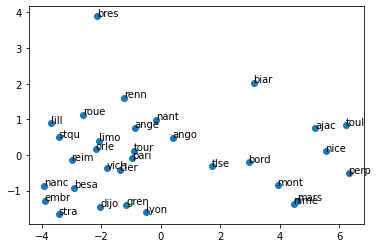

In [3]:
X_pca = pca.transform(Xnorm)

#print("X_pca", X_pca, X_pca[:,0], X_pca[:,1],)

plt.scatter(X_pca[:,0], X_pca[:,1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
#for label, x, y in zip(labels, X_)

